## TAREA 2
## Gestión y Regulación de Riesgos Financieros
#### Constanza Muñoz

El objetivo de la tarea es construir un marco conceptual para entender los desafíos de modelar la reforma de pensiones. Para ello, suponiendo escenarios de rentabilidad y riesgos de los fondos se deberá estimar una distribución de monto final de ahorro de un tipo de individuo bajo ciertos supuestos. 

In [2]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se construye la base de datos usando datos diarios de todo el año 2024 y  hasta el 31 de mayo de 2025 de los Fondos A, B, C, D y E de la AFP Habitat obtenidos en: https://www.spensiones.cl/apps/valoresCuotaFondo/vcfAFC.php . 

In [3]:
# Importamos dataset
vcuotas = 'https://raw.githubusercontent.com/constanzaamunoz/GRRFs/main/valores_cuota_AFP.xlsx'
df = pd.read_excel(vcuotas)

### Se arma la base de datos requerida para desarrollar la pregunta 1
A continuación, se filtra la última fecha de cada mes para calcular los retornos logarítmicos mensuales de cada Fondo de la AFP Habitat y se guarda en un nuevo DataFrame llamado "retornos".

In [4]:
# Filtramos la última fecha de cada mes
df = df.sort_values("Fecha")
df_mensual= df.copy()
df_mensual["Fecha"]=df_mensual["Fecha"].dt.to_period("M")
df_mensual = df_mensual.groupby("Fecha").last().reset_index()

In [5]:
# Retornos logaritmicos de los valores cuota de AFP Habitat mensuales respecto al mes anterior
df_mensual["RetLogA"] = np.log(df_mensual["Valor Cuota A"] / df_mensual["Valor Cuota A"].shift(1))
df_mensual["RetLogB"] = np.log(df_mensual["Valor Cuota B"] / df_mensual["Valor Cuota B"].shift(1))
df_mensual["RetLogC"] = np.log(df_mensual["Valor Cuota C"] / df_mensual["Valor Cuota C"].shift(1))
df_mensual["RetLogD"] = np.log(df_mensual["Valor Cuota D"] / df_mensual["Valor Cuota D"].shift(1))
df_mensual["RetLogE"] = np.log(df_mensual["Valor Cuota E"] / df_mensual["Valor Cuota E"].shift(1))


In [12]:
#guardamos los retornos logaritmicos en un nuevo DataFrame
retornos = df_mensual[["Fecha", "RetLogA", "RetLogB", "RetLogC", "RetLogD", "RetLogE"]].dropna()
retornos

,Fecha,RetLogA,RetLogB,RetLogC,RetLogD,RetLogE
1,2024-02,0.063112,0.048722,0.027584,0.003907,-0.004302
2,2024-03,0.027722,0.023711,0.021956,0.018436,0.018961
3,2024-04,-0.047948,-0.040195,-0.036540,-0.034428,-0.033440
4,2024-05,-0.010538,-0.004555,-0.000255,0.003823,0.004927
5,2024-06,0.030296,0.025043,0.014301,0.003818,-0.000153
6,2024-07,0.013359,0.014505,0.019426,0.029294,0.034446
7,2024-08,-0.009041,0.000429,0.019394,0.042091,0.050550
8,2024-09,0.013674,0.018520,0.030657,0.047765,0.057591
9,2024-10,0.024277,0.009698,-0.018308,-0.046878,-0.055599
10,2024-11,0.024750,0.021654,0.018529,0.021570,0.026475


In [7]:
# Volatilidades mensuales 
ret = retornos.select_dtypes(include='number')
volatilidades = ret.std() 
volatilidades

RetLogA    0.026320
RetLogB    0.020396
RetLogC    0.019169
RetLogD    0.027332
RetLogE    0.032161
dtype: float64

-----------

## PREGUNTA 1

Se estimará mu y sigma de cada fondo, y la matriz de correlaciones, considerando que los valores cuota siguen un proceso MBG. Suponemos que el valor cuota de cada fondo sigue un MBG, lo que implica que sus retornos logarítmicos son i.i.d., normalmente distribuidos y con media constante en el tiempo.

Sabemos que, como sigue un proceso Browniano Geométrico, la esperanza de los retornos logarítmicos (el promedio de los retornos log mensuales) será igual a mu + sigma^2/2 con sigma igual a la desviación estándar de los retornos log mensuales. De manera que, se calculará el promedio de los retornos log mensuales y despejaremos mu para fondo. 

In [31]:
# Retornos esperados del Fondo A al E
Eret = {}

for i in ['A', 'B', 'C', 'D', 'E']:
    col = f"RetLog{i}"
    Eret[f"Eret_{i}"] = retornos[col].mean()


In [33]:
# estimamos mu para cada fondo y sigma

mu = {}
print("Fondo |  Eret_i  |  sigma_i |   mu_i")
print("---------------------------------------")

for i in ['A', 'B', 'C', 'D', 'E']:
    Eret_i = Eret[f"Eret_{i}"]
    sigma_i = volatilidades[f"RetLog{i}"]
    mu_i = Eret_i - 0.5 * sigma_i**2
    mu[f"mu_{i}"] = mu_i

    print(f"  {i}   | {Eret_i:.6f} | {sigma_i:.6f} | {mu_i:.6f}")

Fondo |  Eret_i  |  sigma_i |   mu_i
---------------------------------------
  A   | 0.009312 | 0.026320 | 0.008966
  B   | 0.008867 | 0.020396 | 0.008659
  C   | 0.007682 | 0.019169 | 0.007498
  D   | 0.006564 | 0.027332 | 0.006190
  E   | 0.006344 | 0.032161 | 0.005827


<Axes: >

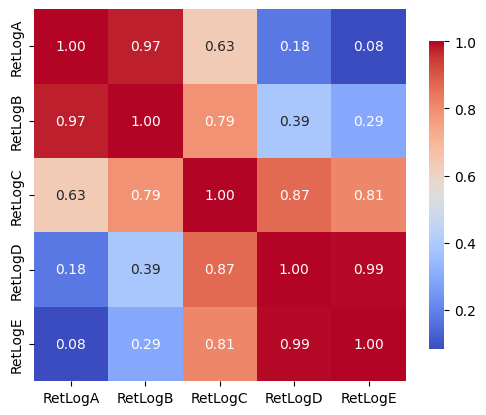

In [34]:
#correlaciones
correlaciones = ret.corr()
# Matriz de correlación
plt.figure(figsize=(6, 5))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})    

-------------------------------------------
## PREGUNTA 2

"Usando Cholesky, genere una simulación del retorno del valor cuota de cada Fondo, para los próximos 35 años, asumiendo un paso mensual. Construya estadísticas (y gráficos) relevantes para la trayectoria del valor cuota (percentiles, desviación estándar, promedio). Analice los quintiles del resultado de las trayectorias de los valores cuota".

In [67]:
# Fondos y parámetros
fondos = ['A', 'B', 'C', 'D', 'E']
mu_vector = np.array([mu[f"mu_{i}"] for i in fondos])
sigma_vector = np.array([volatilidades[f"RetLog{i}"] for i in fondos])
rho = correlaciones.loc[[f"RetLog{i}" for i in fondos], [f"RetLog{i}" for i in fondos]].to_numpy()

# Valor cuota al 2025-05 (último mes observado)
F0 = df_mensual[df_mensual["Fecha"] == "2025-05"][[f"Valor Cuota {i}" for i in fondos]].values.flatten()

# Configuración de simulación
T = 35 * 12  # 35 años, mensual
N = 10000    # número de trayectorias
dt = 1       # mensual
n_fondos = len(fondos)

# Cholesky
L = np.linalg.cholesky(rho)

# Inicialización
retornos_log = np.zeros((T, N, n_fondos))
valores_cuota = np.zeros((T + 1, N, n_fondos))
valores_cuota[0] = F0[np.newaxis, :]  # F0 repetido N veces

# Simulación
for t in range(T):
    z = np.random.normal(size=(N, n_fondos))
    shocks = z @ L.T
    retornos_log[t] = mu_vector + sigma_vector * shocks

    valores_cuota[t + 1] = valores_cuota[t] * np.exp(retornos_log[t])

In [73]:
# Estadísticas de los valores cuota simulados
estadisticas = {}

for idx, fondo in enumerate(fondos):
    serie = valores_cuota[:, :, idx]  # (tiempo, simulaciones)
    
    df_stats = pd.DataFrame({
        "Año": tiempo,  # meses expresados en años
        "Media": serie.mean(axis=1), # valores cuota promedio esperados por mes
        "DesvEst": serie.std(axis=1),
        "P10": np.percentile(serie, 10, axis=1),
        "P25": np.percentile(serie, 25, axis=1),
        "Mediana": np.percentile(serie, 50, axis=1),
        "P75": np.percentile(serie, 75, axis=1),
        "P90": np.percentile(serie, 90, axis=1)
    })
    
    estadisticas[fondo] = df_stats

# ejemplo: estadísticas del Fondo A
estadisticas['A'].head()  


,Año,Media,DesvEst,P10,P25,Mediana,P75,P90
0,0.000000,78235.950000,1.455192e-11,78235.950000,78235.950000,78235.950000,78235.950000,78235.950000
1,0.083333,78944.383643,2.079667e+03,76303.948422,77536.400889,78902.237630,80320.962398,81643.305330
2,0.166667,79676.740451,2.967811e+03,75912.286106,77637.278761,79643.751283,81592.179786,83467.207326
3,0.250000,80400.328367,3.702352e+03,75737.981048,77846.875444,80297.658633,82854.376793,85221.018156
4,0.333333,81172.743262,4.288794e+03,75785.294055,78232.495214,81027.979646,83928.729834,86693.202585


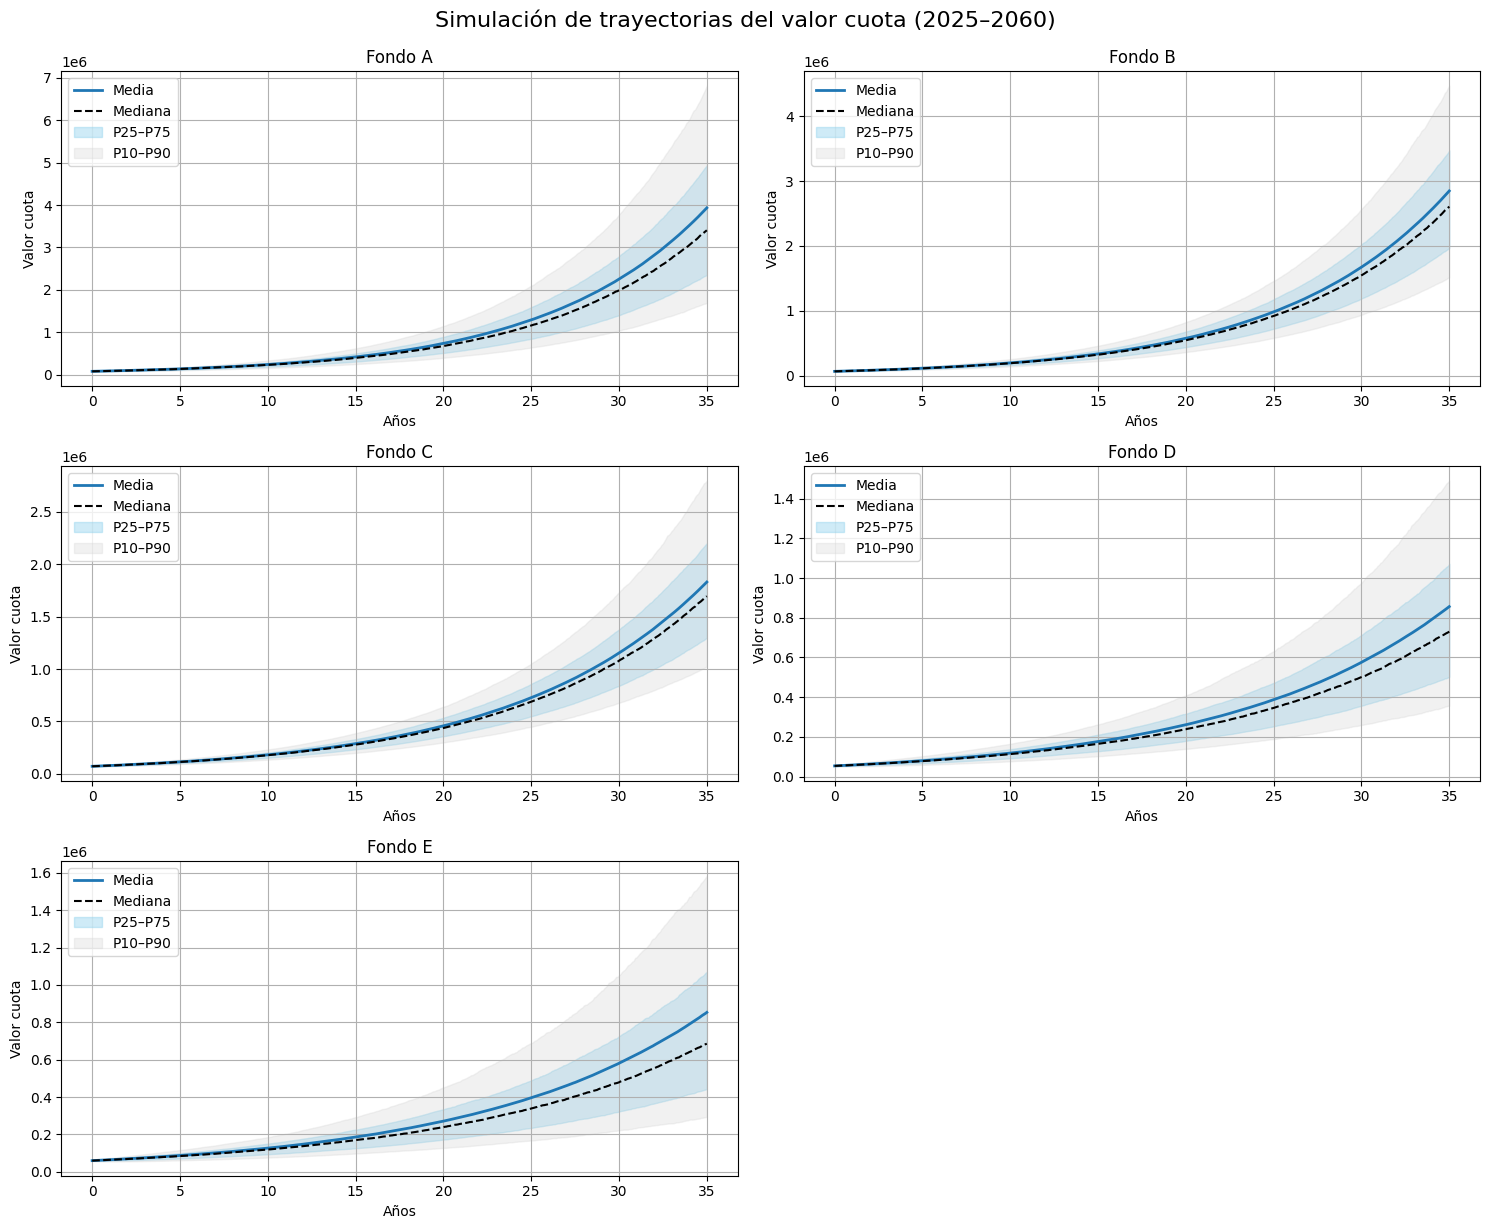

In [69]:
#Gráfico de trayectorias del valor cuota
tiempo = np.arange(T + 1) / 12  # en años
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for idx, fondo in enumerate(fondos):
    serie = valores_cuota[:, :, idx]
    media = serie.mean(axis=1)
    p10 = np.percentile(serie, 10, axis=1)
    p25 = np.percentile(serie, 25, axis=1)
    p50 = np.percentile(serie, 50, axis=1)
    p75 = np.percentile(serie, 75, axis=1)
    p90 = np.percentile(serie, 90, axis=1)

    ax = axes[idx]
    ax.plot(tiempo, media, label='Media', linewidth=2)
    ax.plot(tiempo, p50, linestyle='--', color='black', label='Mediana')
    ax.fill_between(tiempo, p25, p75, color='skyblue', alpha=0.4, label='P25–P75')
    ax.fill_between(tiempo, p10, p90, color='lightgray', alpha=0.3, label='P10–P90')
    ax.set_title(f"Fondo {fondo}")
    ax.set_xlabel("Años")
    ax.set_ylabel("Valor cuota")
    ax.grid(True)
    ax.legend()

if len(fondos) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle("Simulación de trayectorias del valor cuota (2025–2060)", fontsize=16, y=1.02)
plt.show()

#### Análisis de los quintiles del resultado de las trayectorias de los valores cuota:

Sabemos que los cotizantes de quintiles altos acumularán más capital, no solo por su mayor ingreso (pues una persona del quintil 2 podrá aportar menos que una persona del quintil 4 mensualmente), sino porque pueden aprovechar mejor el crecimiento compuesto del valor cuota. 

Si dos personas del mismo quintil (por ejemplo, el quintil 2) cotizan en distintos fondos —una en el Fondo A y otra en el Fondo E—, sus resultados acumulados serán distintos debido a las diferencias en la rentabilidad esperada y la volatilidad entre los fondos. En particular, los gráficos muestran que incluso entre quienes tienen ingresos altos, existe incertidumbre en los resultados futuros, como lo refleja la dispersión entre los percentiles P10 y P90.

Los fondos más riesgosos, como el Fondo A, ofrecen una rentabilidad esperada más alta, pero también mayor dispersión en sus trayectorias. Este tipo de fondos puede ser más adecuado para cotizantes jóvenes, como la Persona 1 elegida (mujer, 35 años, quintil 2), que tiene un horizonte de inversión más largo y mayor tolerancia al riesgo. En contraste, los fondos más conservadores, como el Fondo D o el Fondo E, muestran trayectorias más estables, lo cual los hace más apropiados para cotizantes de mayor edad o con menor tolerancia al riesgo, como la Persona 2 escogida (hombre, 58 años, quintil 4).

--------------------------------------------------
# PREGUNTA 3
"Simulen el fondo de cada uno de los dos individuos, suponiendo que cotiza un 10% de su sueldo, no hay lagunas previsionales hacia adelante, y que la jubilación se logra a los 65 años para los hombres y 60 años para las mujeres. Encuentre el resultado promedio y los quintiles 25 y 75 de las trayectorias de sus montos capitalizados. Encuentre además la distribución de probabilidad de cada uno de los individuos (histograma) del monto final ahorrado al momento de la jubilación".


Personas elegidas:
- Persona 1: 35 años, mujer, quintil 2.
- Persona 2: 58 años, hombre, quintil 4. 

Se supone para los montos acumulados que la persona del quintil 2 tiene son 0, mientras que la persona 2 perteneciente al quintil 4 y quien ha trabajado desde los 20 años (es decir, 38 años) ha acumulado un total de: 
- considerando el promedio simple entre el quintil actual y el anterior: 1.144.259,2
- considerando que se cotiza un 10% mensual. 
- considerando 38 años como 456 meses. 
Entonces, ha ahorrado: 
1.144.259,2 * 456 * 10% = $52.178.083 aproximadamente. 

In [117]:
# Individuos elegidos 
individuos = {
    "Persona 1": {
        "edad_actual": 35,
        "sexo": "Mujer",
        "quintil": 2,
        "sueldo": 554179,
        "fondo": 'A',
        "edad_jubilacion": 60,
        "monto_acumulado": 0
    },
    "Persona 2": {
        "edad_actual": 58,
        "sexo": "Hombre",
        "quintil": 4,
        "sueldo": 1388719,
        "fondo": 'E',
        "edad_jubilacion": 65,
        "monto_acumulado": 52178083
    }
}

In [146]:
fondos_idx = {f: i for i, f in enumerate(fondos)}

resultados = {}
for nombre, datos in individuos.items():
    # Tiempo restante
    edad_restante = datos['edad_jubilacion'] - datos['edad_actual']
    n_meses = edad_restante * 12

    # Fondo asignado y valor cuota simulado
    idx_fondo = fondos_idx[datos['fondo']]
    serie_valor_cuota = valores_cuota[:n_meses + 1, :, idx_fondo]

    aporte_mensual = datos['sueldo'] * 0.10

    # Cuotas compradas mes a mes
    cuotas = aporte_mensual / serie_valor_cuota
    cuotas_acumuladas = cuotas.sum(axis=0)

    # Valor cuota al jubilar
    valor_final = valores_cuota[n_meses, :, idx_fondo]

    # Monto capitalizado al jubilar
    monto = cuotas_acumuladas * valor_final

    # Monto final acumulado = monto final + monto previamente acumulado
    monto_final = monto + datos["monto_acumulado"]

    # Guardar resultados
    resultados[nombre] = {
        "monto": monto,
        "monto_final": monto_final,
        "media_monto": monto.mean(),
        "media_monto_final": monto_final.mean(),
        "p25": np.percentile(monto_final, 25),
        "p75": np.percentile(monto_final, 75)
    }

#Resultados
df_resultados = pd.DataFrame({
    nombre: {
        "Monto promedio": res["media_monto"],
        "Monto acumulado promedio ": res["media_monto_final"],
        "Percentil 25": res["p25"],
        "Percentil 75": res["p75"]
    }
    for nombre, res in resultados.items()
}).T

pd.options.display.float_format = '{:,.0f}'.format
display(df_resultados)

,Monto promedio,Monto acumulado promedio,Percentil 25,Percentil 75
Persona 1,"92,681,929","92,681,929","68,933,688","109,649,018"
Persona 2,"15,541,344","67,719,427","65,681,257","69,414,978"


Si el valor cuota aumenta, también lo hará el valor de los ahorros de las personas. Con estos resultados es posible determinar que la persona 2 aún con más de \$52 millones acumulados no alcanza el monto promedio acumulado de la persona 1 que invierte en el fondo A y no tenía capital acumulado inicial, dado que se encuentra en el fondo E que es más conservador (la diferencia entre el percentil 25 y 75 en la persona 2 que invierte en el fondo E es menor que el de la persona 1 que invierte en el fondo A). 

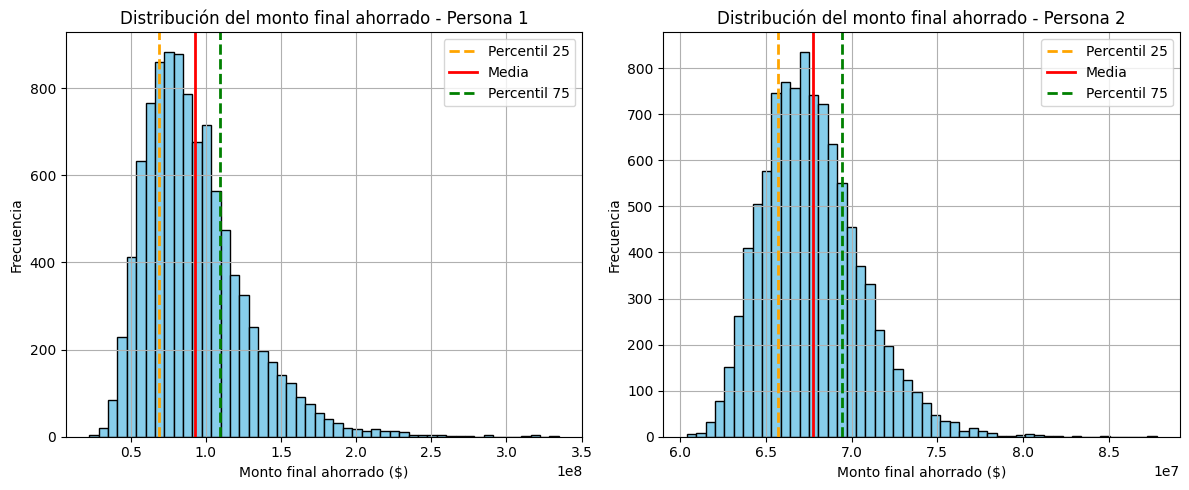

In [124]:
# Histograma
plt.figure(figsize=(12, 5))
for i, (nombre, res) in enumerate(resultados.items()):
    data = res["monto_final"]
    media = res["media_monto_final"]
    p25 = res["p25"]
    p75 = res["p75"]

    plt.subplot(1, 2, i + 1)
    plt.hist(data, bins=50, color="skyblue", edgecolor="black")

    # Líneas verticales
    plt.axvline(p25, color="orange", linestyle="--", linewidth=2, label="Percentil 25")
    plt.axvline(media, color="red", linestyle="-", linewidth=2, label="Media")
    plt.axvline(p75, color="green", linestyle="--", linewidth=2, label="Percentil 75")

    plt.title(f"Distribución del monto final ahorrado - {nombre}")
    plt.xlabel("Monto final ahorrado ($)")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



--------------------------------------------------
# PREGUNTA 4
"Suponiendo que cada individuo se jubila con una pensión vitalicia, y suponiendo que la tasa de interés vigente al momento de jubilación será de 5%, calcule la distribución de probabilidad de la mensualidad que puede recibir. (Puede suponer que una compañía de seguros compra su fondo con una rentabilidad de 5% anual en pesos, a cambio de un pago mensual). Estime cuál es la probabilidad que cada tipo de individuo no alcance a percibir el sueldo mínimo
como jubilación, y cuánto es (en valor esperado) el subsidio que debiera recibir cada individuo del Estado para alcanzar dicho sueldo mínimo en valor presente (estimen esperanza de vida)".

Una renta vitalicia es una modalidad de pensión que otorga una renta mensual fija, desde el momento en que se suscribe el contrato hasta el fallecimiento del afiliado, incluyendo el pago de pensiones de sobrevivencia a los beneficiarios legales. Para simplificar, consideraremos la esperanza de vida en Chile según data del Banco Mundial (https://datos.bancomundial.org/indicador/SP.DYN.LE00.IN?locations=CL) como fecha en la cual el cotizante deja de recibir la pensión. Además, se considera el sueldo mínimo actual, que corresponde a \$529.000 CLP desde el primero de mayo 2025 (https://www.mintrab.gob.cl/gobierno-y-la-cut-alcanzan-acuerdo-por-salario-minimo-529-000-a-partir-del-1-de-mayo-de-2025/)

In [ ]:
r_anual = 0.05 
r_mensual = (1 + r_anual) ** (1/12) - 1  # tasa mensual equivalente
sueldo_minimo = 529000  # sueldo mínimo mensual actual (desde el 1 de mayo 2025)
esperanza_vida = 81  # esperanza de vida en Chile según datos de la OECD

In [144]:
# Cálculo de pensiones mensuales y subsidios
pensiones = {}
for nombre, res in resultados.items():
    
    # meses pensión
    meses_pension= (esperanza_vida - datos['edad_jubilacion'])*12
    n = meses_pension 
    monto_final = resultados[nombre]["monto_final"]  # vector de simulaciones

    # Pensión mensual 
    pension_mensual = monto_final * r_mensual / (1 - (1 + r_mensual) ** -n)

    # Probabilidad de no alcanzar el sueldo mínimo
    prob_no_minimo = np.mean(pension_mensual < sueldo_minimo)
    probabilidad_str = f"{prob_no_minimo * 100:.2f}".replace('.', ',') + '%'

    # Subsidio requerido en cada simulación
    subsidio_mensual = np.maximum(0, sueldo_minimo - pension_mensual)

    # Valor presente del subsidio total (suma de todos los pagos descontados)
    FD = [(1 + r_mensual) ** -t for t in range(1, n + 1)]
    vp_subsidio = subsidio_mensual * np.sum(FD)

    # Guardar resultados
    pensiones[nombre] = {
        "Pensión promedio": pension_mensual.mean(),
        "P25": np.percentile(pension_mensual, 25),
        "P75": np.percentile(pension_mensual, 75),
        "Prob ( RV < sueldo mínimo)": f"{prob_no_minimo * 100:.2f}".replace('.', ',') + '%',
        "Valor esperado subsidio (VP)": vp_subsidio.mean()
    }

# Crear DataFrame con resultados
df_pensiones = pd.DataFrame(pensiones).T
display(df_pensiones)


,Pensión promedio,P25,P75,Prob ( RV < sueldo mínimo),Valor esperado subsidio (VP)
Persona 1,"696,818","518,270","824,383","27,13%","3,319,957"
Persona 2,"509,140","493,817","521,888","83,21%","2,983,489"
